# Assignment 2 - DIY LINEAR REGRESSOR!

*This assignment is a part of the project ["Customer Churn Analysis: From Data To Strategy"]*


1.   ## Part-1
In this part, you'll build your own linear regression from scratch by 2 methods that were discuseed in class.

  * OLS (Ordinary Least Square) - This method directly calculates the values of the coefficients in equation y=mx+c.
  * Gradient Descent - This method uses an iterative approach to calculate the values of the coefficients. You'll have to calculate the values of both m and b.
2.   ## Part-2
In this part, you'll get predictions from the model you just built. You'll then evaluate the predictions by following metrics:

    * [R2 Score](https://www.investopedia.com/terms/r/r-squared.asp)
    * [MEAN ABSOLUTE ERROR and ROOT MEAN SQUARED ERROR](https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383)
3.  ## Part-3
In this part, you'll have to answer some subjective questions.







If you are stuck or have any doubts, please feel free to put your queries on the Whatsapp group.


Deadline : **31 May, 11:59 pm**


# Import necessary libraries
Feel free to modify it as per your requirements.

In [112]:
import pandas as pd
import numpy as np

In [113]:
from google.colab import files
upload=files.upload()

Saving tvmarketing.csv to tvmarketing (1).csv


# Part-1


### Linear Regressor with OLS method

In [114]:
class MyLRFromOLS:


  def __init__(self):
      self.m = None
      self.b = None

  def fit(self,X_train,y_train):
    sum_x = np.sum(X_train)
    sum_y = np.sum(y_train)
    sum_xy = np.sum(X_train * y_train)
    sum_x2 = np.sum(X_train ** 2)
    n = len(X_train)
    # Calculate values of m and b
    self.m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    self.b = (sum_y - self.m * sum_x) / n

  def predict(self,X_test):

    return self.m * X_test + self.b

  def get_coeff(self):
    print(self.m)
    print(self.b)
    # Write code to print the value of m and b

In [115]:
#load dataset
df = pd.read_csv('tvmarketing.csv')
df


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [116]:
df['TV'].values.max()

296.4

In [117]:
df['TV'].values.min()

0.7

In [118]:
# to scale down the input values
def scale(x):
  return (x - 0.7) / (296.4 - 0.7)

In [119]:
df['TV'] = df['TV'].apply(scale)

In [120]:
# Separate input and output columns
X = df['TV'].values
y = df['Sales'].values

In [121]:
X

array([0.77578627, 0.1481231 , 0.0557998 , 0.50997633, 0.60906324,
       0.02705445, 0.19208657, 0.4041258 , 0.02671627, 0.67331755,
       0.2211701 , 0.72370646, 0.07811972, 0.32735881, 0.68785932,
       0.65843761, 0.22691917, 0.94927291, 0.2316537 , 0.49577274,
       0.73621914, 0.80047345, 0.04227257, 0.76969902, 0.20831924,
       0.8867095 , 0.4808928 , 0.80960433, 0.83902604, 0.23638823,
       0.98816368, 0.37943862, 0.32634427, 0.89584038, 0.32127156,
       0.98072371, 0.90023673, 0.25025364, 0.14338857, 0.76868448,
       0.68244843, 0.59621238, 0.99053094, 0.69732837, 0.08251606,
       0.58978695, 0.30098072, 0.80892797, 0.76597903, 0.22387555,
       0.67331755, 0.33716605, 0.72945553, 0.61515049, 0.88603314,
       0.67027393, 0.02231992, 0.4582347 , 0.71051742, 0.71017924,
       0.17855935, 0.88129861, 0.80689888, 0.3449442 , 0.44098749,
       0.23097734, 0.10415962, 0.4687183 , 0.80047345, 0.73080825,
       0.67095029, 0.36895502, 0.08826513, 0.43523842, 0.71931

In [122]:
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [123]:
# Train test split of 80/20. Try changing the ratio and see what results you get

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

  ### Prediction time

In [124]:
olslr = MyLRFromOLS()


In [125]:
olslr.fit(X_train,y_train)

In [126]:
olslr_pred = olslr.predict(X_test)

In [127]:
#View predictions
olslr_pred

array([15.78344456, 10.27007924,  9.51467999, 18.7420916 , 15.31656586,
       16.70146447, 10.03401697, 20.34731499, 10.5061415 , 21.81614685,
        7.81503169, 17.98669235, 11.68120699,  6.9756992 , 18.23324627,
        7.46880704,  7.88322746, 14.51395416, 17.56178028, 17.27325973,
       18.54275013, 20.35780665,  9.58287576,  8.50223517, 18.86799147,
       15.40049911, 15.75196959, 10.18614599, 18.48504602, 18.31717952,
       21.08173092, 13.44380523, 17.04768912, 13.71134246,  6.84979933,
       12.32644385, 18.12308388, 19.59716157, 20.47846069, 16.14540669])

In [128]:
#Get values of m and b
olslr.get_coeff()

15.511913649718924
6.603245405251092


### Linear Regressor with gradient descent


In [129]:
class MyLRFromGD:
  def __init__(self,learning_rate,epochs):
    self.lr = learning_rate
    self.epochs = epochs
    self.m = np.random.randn()
    self.b = np.random.randn()

  def fit(self,X,y):
    n = len(X)
    print(n)
    for i in range(self.epochs):
      y_pred = self.m * X + self.b
      # Calculate gradients
      dm = (-2 / n) * np.dot(X.T, (y - y_pred))
      db = -(2 / n) * np.sum(y - y_pred)
      self.m -= (self.lr * dm)
      self.b -= (self.lr * db)

  def predict(self,X):
    return self.m * X + self.b

  def get_coeff(self):
    #Write code to get values of m and b
    return self.m, self.b




### Prediction Time
Since we have already split the dataset, we're not going to repeat it again.

In [130]:
#Check with different values of learning_rate and epochs for model convergence
learning_rate = 0.01
epochs = 100
gdlr = MyLRFromGD(learning_rate, epochs)

In [131]:
gdlr.fit(X_train,y_train)

160


In [132]:
gdlr_pred = gdlr.predict(X_train)

In [133]:
# View predictions
gdlr_pred

array([16.84629794, 13.81699266, 15.96664486, 12.70643065, 16.34324634,
       14.64716525, 14.1880963 ,  9.34175763, 11.34021946,  9.5616709 ,
       12.94283741, 15.4361041 , 15.22443758, 14.57569344, 11.0350898 ,
       12.34082484, 10.18842371,  9.55892198,  9.86130273, 16.93426325,
       16.16181789, 15.36463229, 12.27485086, 17.3933322 , 17.13768302,
       11.39244886, 16.29926368, 10.00974418,  9.68262319, 12.19788121,
       13.62731746,  9.81457116, 15.92266221, 12.51125762, 10.54578278,
        9.85580489,  9.79532874, 10.55128061, 14.06439508, 17.18441459,
       16.0078786 , 16.65937166, 13.84448182, 13.87471989, 15.90067088,
       15.64777062, 15.92266221, 13.44039118, 17.28612448, 12.77790246,
       15.32614747,  9.64413837, 11.90374721, 15.3838747 , 12.63495883,
       17.37408979, 14.48497921, 17.05796446, 15.11448095, 15.32889638,
       11.47216742, 11.52714574, 14.40526065, 11.39794669, 16.21954512,
       12.64870341, 15.84844148, 14.79010887, 11.18628017, 14.75

In [134]:
# Get values of m and b
gdlr.get_coeff()

(8.128544215923744, 9.34175762697726)

In [135]:
# Compare values of m and b obtained from both methods

# Part-2

### R2 Score
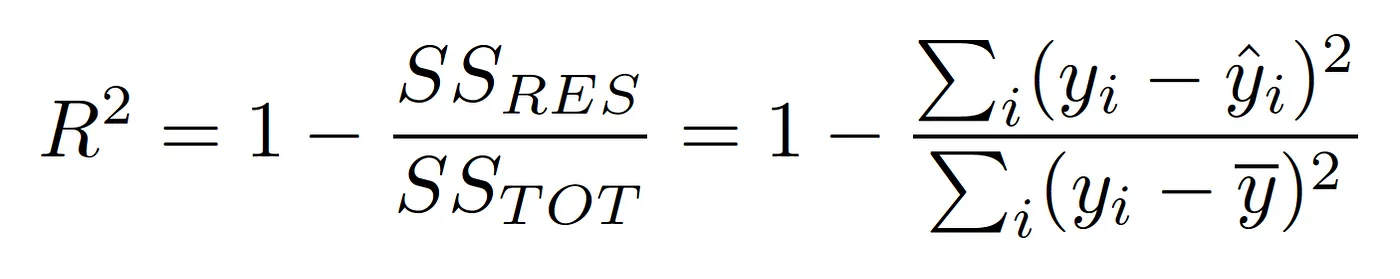

### MEAN ABSOLUTE ERROR
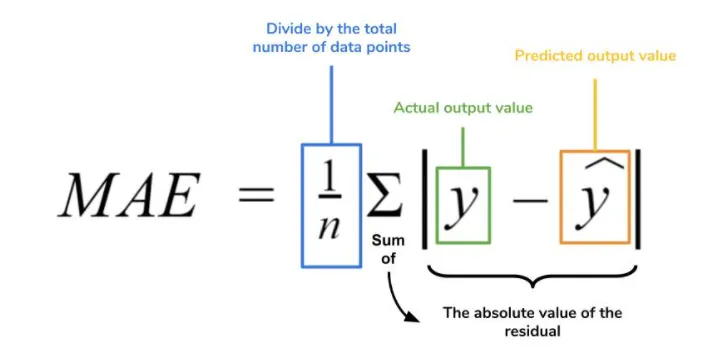

### ROOT MEAN SQUARED ERROR
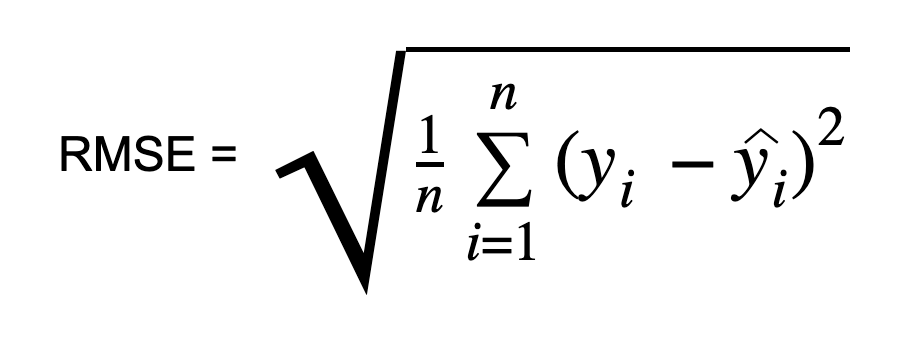

### Evaluation time
Let's see how does both of our models perform.

In [136]:
# Implement R2 Score, MAE and RMSE

class evaluate:

  def r2score(y_pred,y):
    #Write code here
    y_mean = np.mean(y)
    ss_tot = np.sum((y - y_mean)**2)
    ss_res = np.sum((y - y_pred)**2)
    r2 = 1 - (ss_res/ss_tot)
    return r2


  def mae(y_pred,y):
    #Write code here
    mae = np.mean(abs(y - y_pred))
    return mae


  def rmse(y_pred,y):
    #write code here
    rmse = np.sqrt(np.mean((y - y_pred)**2))
    return rmse


In [137]:
# First calculate all the metrics for olslr_pred

In [140]:
eval = evaluate()
eval.r2score(olslr_pred,y_test)

TypeError: evaluate.r2score() takes 2 positional arguments but 3 were given

In [ ]:
eval.rmse(olslr_pred,y_test)

In [ ]:
eval.mae(olslr_pred,y_test)

In [ ]:
# Now for gdlr_pred

In [ ]:
eval.rmse(gdlr_pred,y_test)

In [ ]:
eval.mae(gdlr_pred,y_test)

In [ ]:
eval.r2score(gdlr_pred,y_test)

# Part-3
In this part you'll have to answer the questions provided in the below google form:

[Questions](https://forms.gle/2KfpQNvmf5fd9MTw9)

**After Submitting the form, you are required to paste the screenshot of the form.**

## Steps to add screenshot:


1.   Take the screenshot of the submitted form.
2.   Now create a text block below this block in whichever IDE you are using, for example, if you are using VS Code, you will get 2 options below and above each block, Code and Markdown, chose the **Markdown** one.
3.   Now insert the image and run the cell.

### Voila!

